# Task: Image Classification Model using multiclass classifier

## Dataset info: 
    - In the original dataset, there are 61 classes in total. 
    - For my classification model I have to consider only 7 classes [“banana, beer, apple, biscuits, butter, broccoli, cheese”]

In [4]:
import os
import shutil
import numpy as np
import pandas as pd

from fastai.vision.all import *

from sklearn.metrics import confusion_matrix
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt


## Data Preprocessing and Loading

Assuming you have a folder containing food images and a CSV file mapping each image to its corresponding class, you'll need to perform the following steps:
Data Preparation and Splitting:
- Load the images.
- Split the dataset into training, validation, and testing sets according to the specified percentages.

In [5]:
# Read the CSV file
csv_file = '/home/tomar/workspace/Priyanka/archive/train_img.csv'  
labels = pd.read_csv(csv_file)

# List of desired class names
desired_classes = ["banana", "beer", "apple", "biscuits", "butter", "broccoli", "cheese"]

# Filter the CSV for desired classes
filtered_labels = labels[labels['ClassName'].isin(desired_classes)]

# Save the filtered CSV
desired_csv_file = 'desired_labels.csv'  # Replace with a desired name
filtered_labels.to_csv(desired_csv_file, index=False)


In [6]:
# Paths
dataset_path = '/home/tomar/workspace/Priyanka/archive/train_images/'
desired_labels = '/home/tomar/workspace/Priyanka/desired_labels.csv' 
output_folder = '/home/tomar/workspace/Priyanka/desired_images'

# Read the CSV file with desired file names
labels = pd.read_csv(desired_labels)

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through each file name in the CSV and copy the corresponding images to the output folder
for index, row in labels.iterrows():
    file_name = row['ImageId']
    source_path = os.path.join(dataset_path, file_name)
    
    # Check if the file exists and copy it to the output folder
    if os.path.exists(source_path):
        shutil.copy(source_path, output_folder)
    else:
        print(f"File {file_name} not found.")

print("Extraction complete.")


Extraction complete.


In [7]:
# Path to your dataset folder
dataset_path = '/home/tomar/workspace/Priyanka/desired_images'  # Update this with the path to your dataset folder
csv_file = '/home/tomar/workspace/Priyanka/desired_labels.csv'  # Update this with the name of your desired labels CSV file
output_folder = '/home/tomar/workspace/Priyanka/root_images'  # The output folder where images will be organized

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Read the CSV file with desired class names
data = pd.read_csv(csv_file)

# Iterate through each row in the CSV and organize the images to the output folder
for index, row in data.iterrows():
    file_name = row['ImageId']
    class_name = row['ClassName']
    source_path = os.path.join(dataset_path, file_name)
    
    # Check if the file exists and copy it to the output folder with appropriate class name
    if os.path.exists(source_path):
        class_folder = os.path.join(output_folder, class_name)
        if not os.path.exists(class_folder):
            os.makedirs(class_folder)
        shutil.copy(source_path, os.path.join(class_folder, file_name))
    else:
        print(f"File {file_name} not found.")

print("Organization complete.")


Organization complete.


### Define a Classifier using fastAI:

In [8]:
# Define paths
path = Path('/home/tomar/workspace/Priyanka/root_images')

# Load data using DataBlock
dls = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2, item_tfms=Resize(224))

# Create a learner
learn = cnn_learner(dls, resnet18, metrics=accuracy)

# Train the model
learn.fine_tune(50)  # Train the model for 5 epochs





/home/tomar/miniconda3/envs/py311/lib/python3.11/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,2.206267,1.009943,0.714286,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.860541,0.840492,0.769585,00:03
1,0.701520,0.781629,0.769585,00:03
2,0.571579,0.755785,0.778802,00:03
3,0.473941,0.734009,0.788018,00:03
4,0.396260,0.738992,0.778802,00:03
5,0.326535,0.758560,0.792627,00:03
6,0.266002,0.738527,0.801843,00:03
7,0.215673,0.769106,0.797235,00:03
8,0.170936,0.784549,0.792627,00:03
9,0.137194,0.792695,0.797235,00:03


### Visualization of the Confusion Matrix:

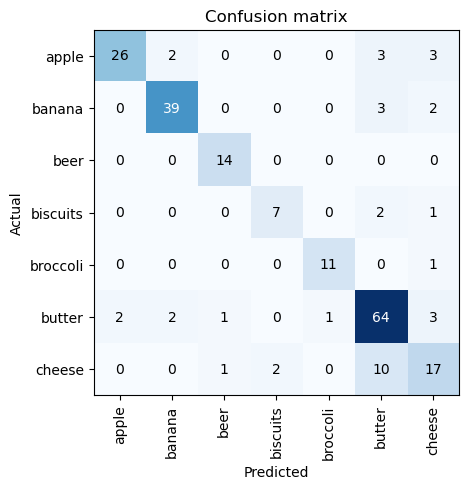

In [9]:
# Show confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


### Prediction of Class from User Input Image:

In [12]:
# Ask the user to input the image file path
image_path = input("Enter the path to the image file: ")

# Load the image using the provided path
input_image = Image.open(image_path).convert('RGB')
# input_image = Image.open('/home/tomar/workspace/Priyanka/root_images/banana/0b70ff38f1.jpg').convert('RGB')

Enter the path to the image file:  /home/tomar/workspace/Priyanka/root_images/banana/0b70ff38f1.jpg


In [13]:
# Predict classes for the input image
pred_class, _, _ = learn.predict(img)
print("Predicted class:", pred_class)

Predicted class: banana
